# Module

In [108]:
# required module
import numpy as np
from PIL import Image
from pylab import *

#torch
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms

In [109]:
#obtain the example training data
x1 = Image.open(
    r'data/data2fIm/input2d1.jpg').convert('L')
y1 = np.asarray(x1.getdata(), dtype=np.float64).reshape((x1.size[1], x1.size[0]))
target_x1 = Image.open(
    r'data/label2fIm/target2l1.jpg').convert('L')
target_y1 = np.asarray(target_x1.getdata(), dtype=np.float64).reshape(
    (target_x1.size[1], target_x1.size[0]))

x2 = Image.open(
    r'data/data2fIm/input2d2.jpg').convert('L')
y2 = np.asarray(x2.getdata(), dtype=np.float64).reshape((x2.size[1], x2.size[0]))
target_x2 = Image.open(
    r'data/label2fIm/target2l2.jpg').convert('L')
target_y2 = np.asarray(target_x2.getdata(), dtype=np.float64).reshape(
    (target_x2.size[1], target_x2.size[0]))


#data
y_dat1 = np.asarray(y1, dtype=np.uint8)
y_dat1_Im = transforms.ToTensor()(y_dat1).unsqueeze_(0)
print(y_dat1_Im.shape)

y_dat2 = np.asarray(y2, dtype=np.uint8)
y_dat2_Im = transforms.ToTensor()(y_dat2).unsqueeze_(0)
print(y_dat2_Im.shape)
#label
target_dat1_y = np.asarray(target_y1, dtype=np.uint8)
target_dat1_y_im = transforms.ToTensor()(target_dat1_y).unsqueeze_(0)
print(target_dat1_y_im.shape)

target_dat2_y = np.asarray(target_y2, dtype=np.uint8)
target_dat2_y_im = transforms.ToTensor()(target_dat2_y).unsqueeze_(0)
print(target_dat2_y_im.shape)

torch.Size([1, 1, 128, 128])
torch.Size([1, 1, 128, 128])
torch.Size([1, 1, 128, 128])
torch.Size([1, 1, 128, 128])


## Visualization of data

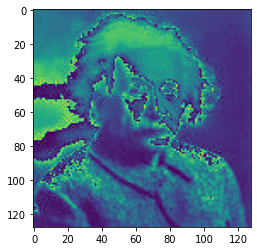

In [110]:
plt.imshow(y_dat1)

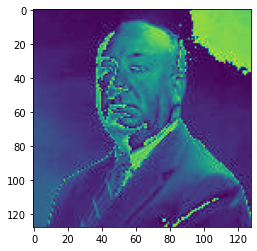

In [111]:
plt.imshow(y_dat2)

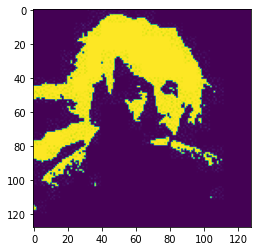

In [112]:
plt.imshow(target_dat1_y)

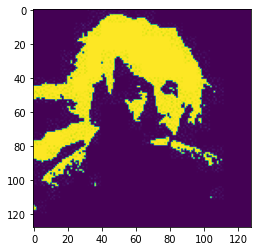

In [113]:
plt.imshow(target_dat1_y)

# Model

In [241]:
#modeling with 16384 x 20 x 20 x 16384
num_data=2
num=128*128

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # input is last input 6, and output is 16, just 16, and kernel size is 5
        self.fc1 = nn.Linear(num, 10)
        #input of 16*5*5, output is 120 just randomw
        self.fc2 = nn.Linear(10, 10)
        #input of last number 120, and 84 randome
        self.fc3 = nn.Linear(10, num)
        #output is 62*29*29  corrspond all the data.
        self.softmax =nn.Sigmoid()

    def forward(self, x):
        x = x.view(-1, num)            # -> n, 16384
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 120
        x = self.softmax(self.fc3(x))    # -> n, 52142
    
        return x
    
net = Net()

In [246]:
#devices, model, criterion, optimizer
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = Net()
model = Net().to(device)
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=100, momentum=0.1)


# Training

In [247]:
#data
inputs = [y_dat1_Im,y_dat2_Im]
labels = [target_dat1_y_im.view(-1, num)[0],target_dat2_y_im.view(-1, num)[0]]

print('Traning Start')
for epoch in range(200):  # loop over the dataset multiple times
    
    for ix in range(2):
        running_loss = 0.0

        # get the inputs; data is a list of [inputs, labels]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs[ix])[0]

        loss = criterion(outputs,labels[ix])
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        print(epoch,"iteration L= ",running_loss);

print('Finished Training')

Traning Start
0 iteration L=  0.6996461153030396
0 iteration L=  1.0249406099319458
1 iteration L=  0.696478545665741
1 iteration L=  0.6946761012077332
2 iteration L=  0.6945891380310059
2 iteration L=  0.6925820112228394
3 iteration L=  0.6926121115684509
3 iteration L=  0.6906195878982544
4 iteration L=  0.6906521320343018
4 iteration L=  0.6886627674102783
5 iteration L=  0.6886976361274719
5 iteration L=  0.6867105960845947
6 iteration L=  0.6867451667785645
6 iteration L=  0.6847583651542664
7 iteration L=  0.6847893595695496
7 iteration L=  0.6827996969223022
8 iteration L=  0.6828228235244751
8 iteration L=  0.6808254718780518
9 iteration L=  0.6808345317840576
9 iteration L=  0.6788230538368225
10 iteration L=  0.6788094639778137
10 iteration L=  0.6767741441726685
11 iteration L=  0.6767261028289795
11 iteration L=  0.674653172492981
12 iteration L=  0.6745538115501404
12 iteration L=  0.6724236011505127
13 iteration L=  0.6722494959831238
13 iteration L=  0.6700344681739807


138 iteration L=  0.32675862312316895
139 iteration L=  0.32907241582870483
139 iteration L=  0.3266621530056
140 iteration L=  0.32897624373435974
140 iteration L=  0.32656675577163696
141 iteration L=  0.32888108491897583
141 iteration L=  0.3264724612236023
142 iteration L=  0.3287869989871979
142 iteration L=  0.3263791501522064
143 iteration L=  0.3286939859390259
143 iteration L=  0.3262869119644165
144 iteration L=  0.32860198616981506
144 iteration L=  0.3261955976486206
145 iteration L=  0.32851094007492065
145 iteration L=  0.32610538601875305
146 iteration L=  0.3284209072589874
146 iteration L=  0.32601606845855713
147 iteration L=  0.328331857919693
147 iteration L=  0.3259277641773224
148 iteration L=  0.3282437324523926
148 iteration L=  0.3258403241634369
149 iteration L=  0.32815656065940857
149 iteration L=  0.3257538676261902
150 iteration L=  0.3280702829360962
150 iteration L=  0.32566821575164795
151 iteration L=  0.32798486948013306
151 iteration L=  0.3255835473

In [255]:
outputs = net(inputs[0])
train_acc = torch.sum(torch.round(torch.flatten(outputs)) == labels[0])/(num)
print("Training Accuracy 1=",np.round(np.array(train_acc),2))
outputs = net(inputs[1])
train_acc = torch.sum(torch.round(torch.flatten(outputs)) == labels[1])/(num)
print("Training Accuracy 2=",np.round(np.array(train_acc),2))

Training Accuracy 1= 0.51
Training Accuracy 2= 0.85


## Training Result

torch.Size([1, 1, 128, 128])


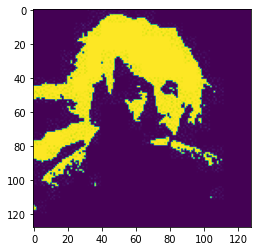

In [249]:
#labeling data
target1=labels[0].reshape([1,1,128,128])
print(target1.shape)
plt.imshow(target1[0][0].detach().cpu().numpy())

torch.Size([1, 1, 128, 128])


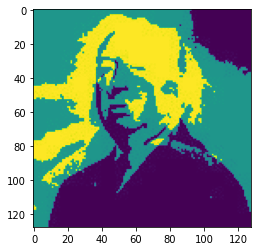

In [252]:
# trained data
outputs = net(inputs[0])
output1=outputs.reshape([1,1,128,128])
print(output1.shape)
plt.imshow(output1[0][0].detach().cpu().numpy())

# Validating Model

In [256]:
# obtain the example training data
x1 = Image.open(
    r'data/data2fIm/input2d3.jpg').convert('L')
y1 = np.asarray(x1.getdata(), dtype=np.float64).reshape(
    (x1.size[1], x1.size[0]))
target_x1 = Image.open(
    r'data/label2fIm/target2l3.jpg').convert('L')
target_y1 = np.asarray(target_x1.getdata(), dtype=np.float64).reshape(
    (target_x1.size[1], target_x1.size[0]))


# data
y_dat1 = np.asarray(y1, dtype=np.uint8)
y_dat1_Im = transforms.ToTensor()(y_dat1).unsqueeze_(0)
print(y_dat1_Im.shape)

# label
target_dat1_y = np.asarray(target_y1, dtype=np.uint8)
target_dat1_y_Im = transforms.ToTensor()(target_dat1_y).unsqueeze_(0)
print(target_dat1_y_Im.shape)

torch.Size([1, 1, 128, 128])
torch.Size([1, 1, 128, 128])


## Visualization

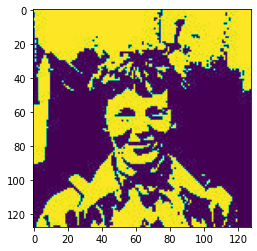

In [257]:
plt.imshow(target_dat1_y)

## data

torch.Size([1, 1, 128, 128])


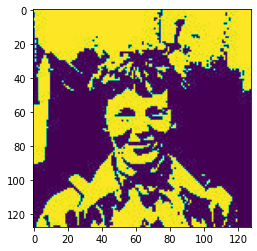

In [258]:
labels = target_dat1_y_Im.view(-1, num)[0]
target1=labels.reshape([1,1,128,128])
print(target1.shape)
plt.imshow(target1[0][0].detach().cpu().numpy())

torch.Size([1, 1, 128, 128])


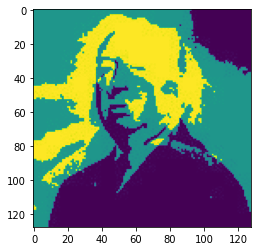

In [259]:
inputs = y_dat1_Im
outputs = net(inputs)
output1=outputs.reshape([1,1,128,128])
print(output1.shape)
plt.imshow(output1[0][0].detach().cpu().numpy())